In [1]:
#loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#QUESTION 1

## What's the version of NumPy that you installed?

np.__version__

'1.23.3'

In [3]:
#loading the dataset

data =pd.read_csv("car_data.csv")

data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#QUESTION 2

## How many records are in the dataset?

features = data.shape[1]
rows = data.shape[0]

print(f"The data has {rows} rows or observations and {features} columns or features ")

The data has 11914 rows or observations and 16 columns or features 


Chevrolet     1123
Ford           881
Volkswagen     809
Name: Make, dtype: int64


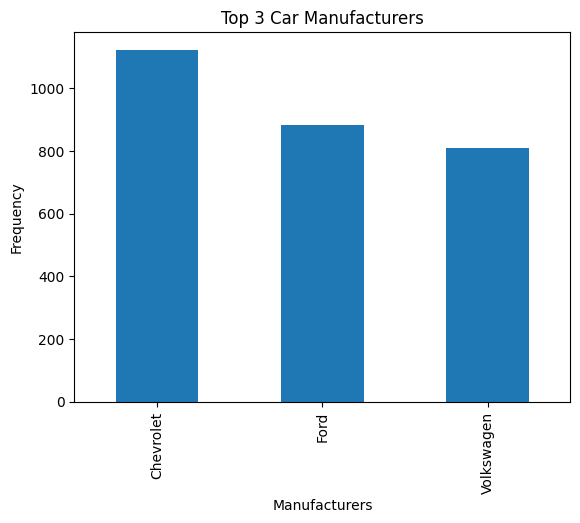

In [5]:
#QUESTION 3

## Who are the most frequent car manufacturers (top-3) according to the dataset?

top3_MAKE = data['Make'].value_counts().sort_values(ascending = False).head(3)

top3_MAKE.plot(kind='bar')
plt.xlabel('Manufacturers')
plt.ylabel('Frequency')
plt.title("Top 3 Car Manufacturers");

print(top3_MAKE)

In [6]:
#QUESTION 4

## What's the number of unique Audi car models in the dataset?

audi_df = data.query("Make == 'Audi' ")
audi_df['Model'].nunique()

34

In [7]:
#QUESTION 5

## How many columns in the dataset have missing values?

count = 0
for column in data.columns:
    if data[column].isnull().sum() > 0:
        count+=1

print(count)

5


In [8]:
#QUESTION 6

## Find the median value of "Engine Cylinders" column in the dataset.

old_median = data['Engine Cylinders'].median()

## calculate the most frequent value of the same "Engine Cylinders"

modal_val = data['Engine Cylinders'].mode()

## Use the fillna method to fill the missing values in "Engine Cylinders" with the most frequent value from the previous step

data['Engine Cylinders'].fillna(modal_val,inplace=True)

##  calculate the median value of "Engine Cylinders" once again
new_median = data['Engine Cylinders'].median()



old_median == new_median



True

In [9]:
#QUESTION 7 

## Select all the "Lotus" cars from the dataset.

lotus_df = data.query("Make == 'Lotus'")

## Select only columns "Engine HP", "Engine Cylinders"

lotus_df = lotus_df[["Engine HP", "Engine Cylinders"]]

## Now drop all duplicated rows using drop_duplicates method (you should get a dataframe with 9 rows)

lotus_df.drop_duplicates(inplace =True)
lotus_df.shape[0]

9

In [10]:
## QUESTION 7 CONT'D

## Get the underlying NumPy array. Let's call it X

X= lotus_df.values

## Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX

XTX = (X.T).dot(X)

## Invert XTX.

XTX_inv = np.linalg.inv(XTX)

## Create an array y with values [1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800].

y = [1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800]

## Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.

w = (XTX_inv.dot(X.T)).dot(y)

## What's the value of the first element of w?

print(w[0])



4.594944810094551
